# SGA-PMX Demo

Skrypt przedstawia przykładową implementację algorytmu Simple Genetic Algorithm (SGA) z operatorem PMX i jego zastosowanie do rozwiązywania problemu komiwojażera (ang. Travelling Salesman Problem, TSP). Popularne instancje problemu TSP można znaleźć w bibliotece TSPLib [1]. Skrypt skupia się na rozwiązywaniu instancji BERLIN52, w celu rozwiązywania innych instancji może okazać się konieczna zmiana ustawień parametrów algorytmu, a może też i operatorów ewolucyjnych.

Literatura:

[1] TSPLIB, http://comopt.ifi.uni-heidelberg.de/software/TSPLIB95/

In [48]:
import numpy as np
import matplotlib.pyplot as plt
import time
import itertools

%matplotlib inline

## Input data

In [36]:
def read_input(n, coords):
    global A
    print('Problem size: %d' % n)

    A = np.empty((n, n))
    for i in range(n):
        for j in range(n):
            A[i, j] = np.sqrt(((coords[i, :] - coords[j, :])**2).sum())
    print('Distance matrix:\n', A)

In [37]:
# BERLIN52

n = 52
coords = np.array([565.0, 575.0, 25.0, 185.0, 345.0, 750.0, 945.0, 685.0, 845.0, 655.0, 880.0, 660.0, 25.0, 230.0, 525.0, 1000.0, 580.0, 1175.0, 650.0, 1130.0, 1605.0, 620.0, 1220.0, 580.0, 1465.0, 200.0, 1530.0, 5.0, 845.0, 680.0, 725.0, 370.0, 145.0, 665.0, 415.0, 635.0, 510.0, 875.0, 560.0, 365.0, 300.0, 465.0, 520.0, 585.0, 480.0, 415.0, 835.0, 625.0, 975.0, 580.0, 1215.0, 245.0, 1320.0, 315.0, 1250.0, 400.0, 660.0, 180.0, 410.0, 250.0, 420.0, 555.0, 575.0, 665.0, 1150.0, 1160.0, 700.0, 580.0, 685.0, 595.0, 685.0, 610.0, 770.0, 610.0, 795.0, 645.0, 720.0, 635.0, 760.0, 650.0, 475.0, 960.0, 95.0, 260.0, 875.0, 920.0, 700.0, 500.0, 555.0, 815.0, 830.0, 485.0, 1170.0, 65.0, 830.0, 610.0, 605.0, 625.0, 595.0, 360.0, 1340.0, 725.0, 1740.0, 245.0])
coords = coords.reshape(n, 2)
read_input(n, coords)
p = [0, 48, 31, 44, 18, 40,  7,  8,  9, 42, 32, 50, 10, 51, 13, 12, 46, 25, 26, 27, 11, 24,  3,  5, 14,  4, 23, 47, 37, 36, 39, 38, 35, 34, 33, 43, 45, 15, 28, 49, 19, 22, 29,  1,  6, 41, 20, 16,  2, 17, 30, 21]
print('Optimal solution:\n', p)

Problem size: 52
Distance matrix:
 [[   0.          666.10809934  281.11385594 ...  217.08293346
   789.38267019 1220.46097848]
 [ 666.10809934    0.          649.32657423 ...  596.25917184
  1421.55724471 1716.04924172]
 [ 281.11385594  649.32657423    0.         ...  463.24939288
   995.3140208  1483.59361012]
 ...
 [ 217.08293346  596.25917184  463.24939288 ...    0.
   829.60834133 1150.76061803]
 [ 789.38267019 1421.55724471  995.3140208  ...  829.60834133
     0.          624.81997407]
 [1220.46097848 1716.04924172 1483.59361012 ... 1150.76061803
   624.81997407    0.        ]]
Optimal solution:
 [0, 48, 31, 44, 18, 40, 7, 8, 9, 42, 32, 50, 10, 51, 13, 12, 46, 25, 26, 27, 11, 24, 3, 5, 14, 4, 23, 47, 37, 36, 39, 38, 35, 34, 33, 43, 45, 15, 28, 49, 19, 22, 29, 1, 6, 41, 20, 16, 2, 17, 30, 21]


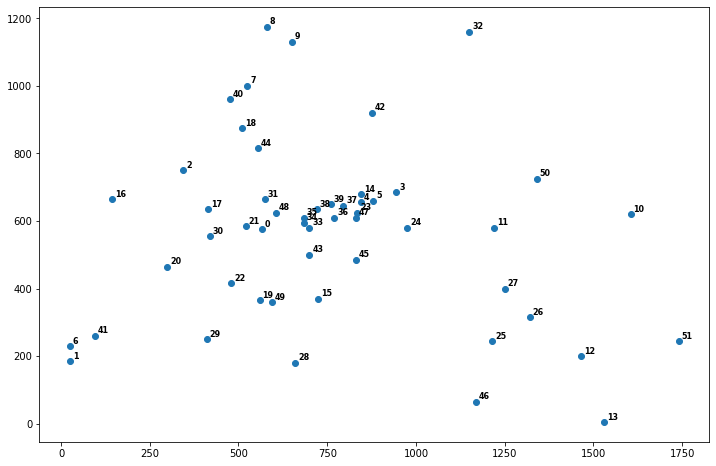

In [38]:
plt.figure(figsize=(12,8))

plt.plot(coords[:, 0], coords[:, 1], 'o')

for i in range(n):
    plt.text(coords[i, 0]+8, coords[i, 1]+8, str(i), fontdict={'weight':'bold', 'size':8})

plt.show()

<Figure size 864x576 with 0 Axes>

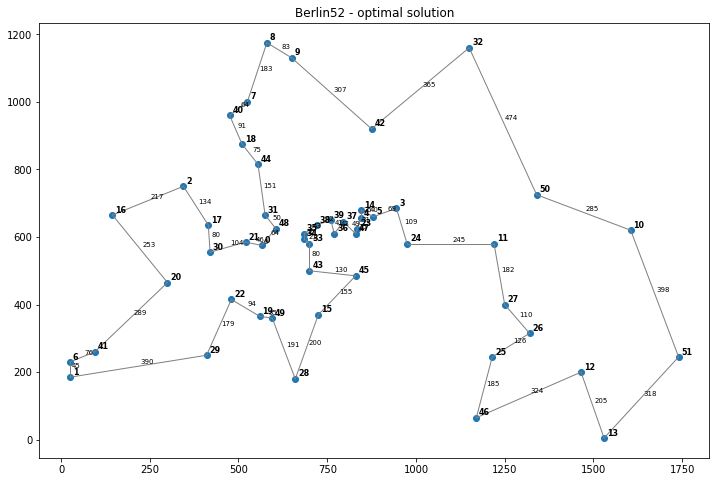

In [39]:
from matplotlib.lines import Line2D

route = p

plt.figure(figsize=(12,8))
fig, ax = plt.subplots(figsize=(12,8))

plt.plot(coords[:, 0], coords[:, 1], 'o')

for i in range(n):
    plt.text(coords[i, 0]+8, coords[i, 1]+8, str(i), fontdict={'weight':'bold', 'size':8})

ax.add_line(Line2D(
    [coords[0, 0], coords[route[0], 0]],
    [coords[0, 1], coords[route[0], 1]],
    linewidth=1, color='gray'))
plt.text((coords[0, 0] + coords[route[0], 0])/2 + 6,
         (coords[0, 1] + coords[route[0], 1])/2 + 6,
         '%d' % A[0, route[0]], fontdict={'weight':'normal', 'size':7})
for i in range(1, len(route)):
    ax.add_line(Line2D(
        [coords[route[i-1], 0], coords[route[i], 0]],
        [coords[route[i-1], 1], coords[route[i], 1]],
        linewidth=1, color='gray'))
    plt.text((coords[route[i-1], 0] + coords[route[i], 0])/2 + 6,
             (coords[route[i-1], 1] + coords[route[i], 1])/2 + 6,
             '%d' % A[route[i-1], route[i]], fontdict={'weight':'normal', 'size':7})
ax.add_line(Line2D(
    [coords[route[-1], 0], coords[0, 0]],
    [coords[route[-1], 1], coords[0, 1]],
    linewidth=1, color='gray'))
plt.text((coords[route[-1], 0] + coords[0, 0])/2 + 6,
         (coords[route[-1], 1] + coords[0, 1])/2 + 6,
         '%d' % A[route[-1], 0], fontdict={'weight':'normal', 'size':7})

plt.title('Berlin52 - optimal solution')

plt.show()

## Objective function

In [40]:
def tsp_objective_function(p):
    s = 0.0
    for i in range(n):
        s += A[p[i-1], p[i]]
    return s

In [41]:
print(tsp_objective_function(p), p)

7544.365901904086 [0, 48, 31, 44, 18, 40, 7, 8, 9, 42, 32, 50, 10, 51, 13, 12, 46, 25, 26, 27, 11, 24, 3, 5, 14, 4, 23, 47, 37, 36, 39, 38, 35, 34, 33, 43, 45, 15, 28, 49, 19, 22, 29, 1, 6, 41, 20, 16, 2, 17, 30, 21]


## Random Sampling

In [8]:
def random_sampling(T, with_chart=False):
    t0 = time.time()
    permutations = np.empty((T, n), dtype=np.int64)
    costs = np.zeros(T)
    for i in range(T):
        permutations[i, :] = np.random.permutation(n)
        costs[i] = tsp_objective_function(permutations[i, :])
    if with_chart:
        plt.figure(figsize=(12,4))
        plt.hist(costs)
        plt.show()

    p = permutations[costs.argmin(), :]
    return tsp_objective_function(p), p, time.time() - t0

## Simulated Annealing

In [9]:
def random_neighbor(p, radius):
    q = p.copy()
    for r in range(radius):
        i, j = np.random.choice(n, 2, replace=False)
        q[i], q[j] = q[j], q[i]
    return q

In [10]:
def simulated_annealing(T, radius, alpha, with_chart=False):
    t0 = time.time()

    p = np.random.permutation(n)
    p_cost = tsp_objective_function(p)
    costs = np.zeros(T)
    perms = []
    for t in range(T):
        q = random_neighbor(p, radius)
        q_cost = tsp_objective_function(q)
        if(q_cost < p_cost):
            p, p_cost = q, q_cost
        elif(np.random.rand() < np.exp(- alpha * (q_cost - p_cost) * t/T)):
            p, p_cost = q, q_cost
        costs[t] = p_cost
        perms.append(p)
    if with_chart:
        plt.figure(figsize=(12,4))
        plt.plot(costs)
        plt.show()

    return costs.min(), perms[costs.argmin()], time.time() - t0

## SGA-PMX

Podpunkt a

In [42]:
def PMX(ind1, ind2):
    size = len(ind1)
    ancestor1 = np.full(size, -1)
    ancestor2 = np.full(size, -1)
    group_indices = np.random.choice(size, 2, False)
    group_begin, group_end = group_indices.min(), group_indices.max()
    ancestor1[group_begin:group_end+1]=ind2[group_begin:group_end+1]
    ancestor2[group_begin:group_end+1]=ind1[group_begin:group_end+1]
    mapping_first_to_second={}
    mapping_second_to_first={}
    for first_elem, second_elem in zip(ancestor1[group_begin:group_end+1], ancestor2[group_begin:group_end+1]):
        mapping_first_to_second[first_elem]=second_elem
        mapping_second_to_first[second_elem]=first_elem
    for i in range(size):
        if i < group_begin or i > group_end:
            if int(ind1[i]) not in mapping_first_to_second.keys():
                ancestor1[i]=ind1[i]
            else:
                selected_index=ind1[i]
                while(selected_index in  mapping_first_to_second.keys()):
                    selected_index=mapping_first_to_second[selected_index]
                ancestor1[i]=selected_index
            if ind2[i] not in mapping_second_to_first.keys():
                ancestor2[i]=ind2[i]
            else:
                selected_index=ind2[i]
                while(selected_index in  mapping_second_to_first.keys()):
                    selected_index=mapping_second_to_first[selected_index]
                ancestor2[i]=selected_index
    assert len(set(ancestor1)) == size
    assert len(set(ancestor2)) == size
    return ancestor1, ancestor2

In [43]:
def reverse_sequence_mutation(p):
    a = np.random.choice(len(p), 2, False)
    i, j = a.min(), a.max()
    q = p.copy()
    q[i:j+1] = q[i:j+1][::-1]
    return q

In [44]:
def SGA_PMX(population_size, chromosome_length, number_of_offspring, crossover_probability, mutation_probability, number_of_iterations, with_chart=False):
    time0 = time.time()
    best_objective_value = np.Inf
    best_chromosome = np.zeros((1, chromosome_length))
    costs = np.zeros(number_of_iterations)
    # generating an initial population
    current_population = np.zeros((population_size, chromosome_length), dtype=np.int64)
    for i in range(population_size):
        current_population[i, :] = np.random.permutation(chromosome_length)

    # evaluating the objective function on the current population
    objective_values = np.zeros(population_size)
    for i in range(population_size):
        objective_values[i] = tsp_objective_function(current_population[i, :])

    for t in range(number_of_iterations):
    
        # selecting the parent indices by the roulette wheel method
        fitness_values = objective_values.max() - objective_values
        if fitness_values.sum() > 0:
            fitness_values = fitness_values / fitness_values.sum()
        else:
            fitness_values = np.ones(population_size) / population_size
        parent_indices = np.random.choice(population_size, number_of_offspring, True, fitness_values).astype(np.int64)

        # creating the children population
        children_population = np.zeros((number_of_offspring, chromosome_length), dtype=np.int64)
        for i in range(int(number_of_offspring/2)):
            if np.random.random() < crossover_probability:
                children_population[2*i, :], children_population[2*i+1, :] = PMX(current_population[parent_indices[2*i], :].copy(), current_population[parent_indices[2*i+1], :].copy())
            else:
                children_population[2*i, :], children_population[2*i+1, :] = current_population[parent_indices[2*i], :].copy(), current_population[parent_indices[2*i+1]].copy()
        if np.mod(number_of_offspring, 2) == 1:
            children_population[-1, :] = current_population[parent_indices[-1], :]

        # mutating the children population
        for i in range(number_of_offspring):
            if np.random.random() < mutation_probability:
                children_population[i, :] = reverse_sequence_mutation(children_population[i, :])

        # evaluating the objective function on the children population
        children_objective_values = np.zeros(number_of_offspring)
        for i in range(number_of_offspring):
            children_objective_values[i] = tsp_objective_function(children_population[i, :])

        # replacing the current population by (Mu + Lambda) Replacement
        objective_values = np.hstack([objective_values, children_objective_values])
        current_population = np.vstack([current_population, children_population])

        I = np.argsort(objective_values)
        current_population = current_population[I[:population_size], :]
        objective_values = objective_values[I[:population_size]]

        best_idx=np.argmin(objective_values)
        # recording some statistics
        
        if best_objective_value > objective_values[best_idx]:
            best_objective_value = objective_values[best_idx]
            best_chromosome = current_population[best_idx, :]
        costs[t]=best_objective_value
    if with_chart:
        plt.figure(figsize=(12,4))
        plt.plot(costs)
        plt.show()
    return best_objective_value, best_chromosome, time.time() - time0

Podpunkt b

Random sampling: 
Permutation [39 45 12 13 28 44 15 22 19 21 49 23 20  5 18  2 40  8 32  9 26 38  4 14
 27 30 17  1  6 41 29 11 46 47 24 50 25 33 34 36 43 42 51 10 48  7 16 35
 31  3  0 37] gives value 21419.883342288897 in time 65.89322590827942
Permutation [14  4  3 25 27 12 51 10 26 47  5 43 30 22 41  2 28 18  7 19 45 38 31 23
 42 16 40 34 24 33  9 37 39 44  1 29 15 36  8 17  0  6 46 20 48 35 49 11
 50 32 13 21] gives value 21961.56799919555 in time 66.47701334953308
Permutation [41 33 23 38 14 26 13 25 24  8 28 16  9 22 49  0  5 50 27  3 39 35  4 34
 32 11  2 19 17 18 43 31 44 45 37 48 30 21 36 10 12 51 15 46  7 20 40 47
 42 29  1  6] gives value 22026.50114809443 in time 67.51899814605713
Permutation [47  0  3 45 24 37 38 18 17 10 49  1 29 16 44  5 48 34 21 22 31 15 41  6
 30  4 40  2  7 11 32 39 19  8  9 42 14 36 46 27 12 20 13 51 50 26 25 43
 28 23 33 35] gives value 21349.941523052934 in time 63.8089964389801
Permutation [22  1 41 20 38 44  9 21 19 39 36 33  7 18 49 34 14 26 25

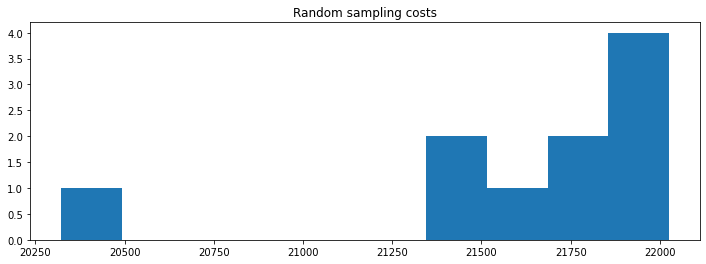

In [29]:
results=np.zeros(10)
print("Random sampling: ")
T = 1000000
for i in range(10):
    best_res, best_perm, duration = random_sampling(T)
    print(f"Permutation {best_perm} gives value {best_res} in time {duration}")
    results[i]=best_res
plt.figure(figsize=(12,4))
plt.title("Random sampling costs")
plt.hist(results)
plt.show()

Simulated annealing: 
Permutation [44 18 31 48 33 43 45 11 50 10 51 13 12 46 25 26 27 24  3  5 42 32  9  8
  7 40  2 16 20 41  6  1 29 28 15 49 19 22 30 17 21  0 34 35 38 36 47 23
  4 14 37 39] gives value 8530.668845033684 in time 53.79600286483765
Permutation [34  0 21  2 17 30 20 41  1  6 16 40  7  8  9 18 44 31 48 35 38 39 37 23
  4  5 14 42 32  3 45 43 15 49 19 22 29 28 46 25 27 26 12 13 51 10 50 11
 24 47 36 33] gives value 8783.093528189556 in time 57.64800524711609
Permutation [39 37 24 27 26 25 46 12 13 51 10 50 11  3  5 45 43 15 28 49 19 29  1  6
 41 22 30 20 16  2 17 21  0 31 48 35 34 33 38 36 47 23  4 14 42 32  9  8
  7 40 18 44] gives value 8493.624372636696 in time 61.00700926780701
Permutation [21 30 17  2 16  6  1 41 20 22 19 43 33 48 31 44 18 40  7  8  9 32 42  5
  3 24 25 12 26 27 11 50 10 51 13 46 28 29 49 15 45 47 23  4 14 37 36 39
 38 35 34  0] gives value 8684.169070053174 in time 62.766000270843506
Permutation [10 51 13 12 28 29  1  6 41 19 49 22 20 16  2 44 18 4

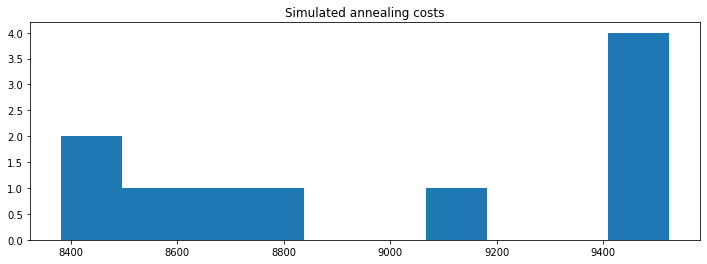

In [30]:
results=np.zeros(10)
print("Simulated annealing: ")
T = 500000
radius = 1
alpha = 1.0
for i in range(10):
    best_res, best_perm, duration = simulated_annealing(T, radius, alpha)
    print(f"Permutation {best_perm} gives value {best_res} in time {duration}")
    results[i]=best_res
plt.figure(figsize=(12,4))
plt.title("Simulated annealing costs")
plt.hist(results)
plt.show()

SGA-PMX:
Permutation [ 4 14  5  3 42 32  9  8  7 40 18 44 31 48  0 21 30 17  2 16  6  1 41 20
 22 29 28 19 49 15 43 45 27 26 25 46 12 13 51 10 50 11 24 23 47 36 33 34
 35 38 39 37] gives value 8068.695617963655 in time 25.582996606826782
Permutation [21  0 31 48 35 34 33 38 39 36 37 47 23  4 14  5  3 24 11 27 25 46 13 51
 12 26 10 50 32 42  9  8  7 40 18 44  2 16 20 41  6  1 29 28 15 45 43 49
 19 22 30 17] gives value 7990.068367787933 in time 24.27400231361389
Permutation [24 11 27 26 25 46 12 13 51 10 50 32 42  9  8  7 40 18 44 31 17  2 16  6
  1 41 29 28 15 49 19 22 20 30 21  0 48 38 39 37 36 35 34 33 43 45 47 23
  4 14  5  3] gives value 7863.973321579757 in time 25.70499849319458
Permutation [24 11 27 25 46 26 12 13 51 10 50 32 42  9  8  7 40 18 44 31 48  0 21 30
 17  2 16 20 41  6  1 29 22 19 49 28 15 43 33 34 35 38 39 36 37 14  3  5
  4 23 47 45] gives value 7735.800471603221 in time 24.610990524291992
Permutation [24 43 33 38 39 36 37 47 23  4 14  5  3 42 32  9  8  7 40 18 44  

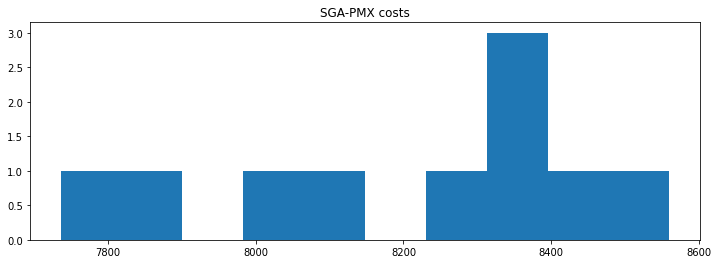

In [31]:
results=np.zeros(10)
print("SGA-PMX:")
population_size = 500
chromosome_length = n
number_of_offspring = population_size
crossover_probability = 0.95
mutation_probability = 0.25
number_of_iterations = 250
for i in range(10):
    best_res, best_perm, duration = SGA_PMX(population_size, chromosome_length, number_of_offspring, crossover_probability, mutation_probability, number_of_iterations)
    print(f"Permutation {best_perm} gives value {best_res} in time {duration}")
    results[i]=best_res
plt.figure(figsize=(12,4))
plt.title("SGA-PMX costs")
plt.hist(results)
plt.show()

Podpunkt c

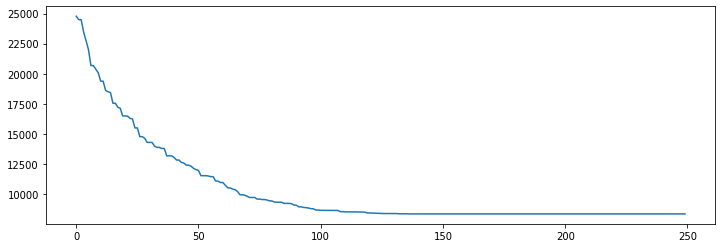

(8370.565974133198,
 array([37, 39, 38, 48,  0, 21, 30, 17,  2, 31, 44, 18, 40,  7,  8,  9, 32,
        42, 14,  4,  5,  3, 11, 50, 10, 51, 13, 12, 26, 46, 25, 27, 24, 45,
        15, 28, 29,  1,  6, 41, 16, 20, 22, 19, 49, 43, 33, 34, 35, 36, 47,
        23], dtype=int64),
 25.540998697280884)

In [32]:
SGA_PMX(population_size, chromosome_length, number_of_offspring, crossover_probability, mutation_probability, number_of_iterations, with_chart=True)

Podpunkt d

In [33]:
def transposition_mutation(p):
    a = np.random.choice(len(p), 2, False)
    i, j = a.min(), a.max()
    q = p.copy()
    q[i], q[j] = q[j], q[i]
    return q

In [56]:
def SGA_PMX2(population_size, chromosome_length, number_of_offspring, crossover_probability, mutation_probability, number_of_iterations, with_chart=False):
    time0 = time.time()
    best_objective_value = np.Inf
    best_chromosome = np.zeros((1, chromosome_length))
    costs = np.zeros(number_of_iterations)
    # generating an initial population
    current_population = np.zeros((population_size, chromosome_length), dtype=np.int64)
    for i in range(population_size):
        current_population[i, :] = np.random.permutation(chromosome_length)

    # evaluating the objective function on the current population
    objective_values = np.zeros(population_size)
    for i in range(population_size):
        objective_values[i] = tsp_objective_function(current_population[i, :])

    for t in range(number_of_iterations):
    
        # selecting the parent indices by the roulette wheel method
        fitness_values = objective_values.max() - objective_values
        if fitness_values.sum() > 0:
            fitness_values = fitness_values / fitness_values.sum()
        else:
            fitness_values = np.ones(population_size) / population_size
        parent_indices = np.random.choice(population_size, number_of_offspring, True, fitness_values).astype(np.int64)

        # creating the children population
        children_population = np.zeros((number_of_offspring, chromosome_length), dtype=np.int64)
        for i in range(int(number_of_offspring/2)):
            if np.random.random() < crossover_probability:
                children_population[2*i, :], children_population[2*i+1, :] = PMX(current_population[parent_indices[2*i], :].copy(), current_population[parent_indices[2*i+1], :].copy())
            else:
                children_population[2*i, :], children_population[2*i+1, :] = current_population[parent_indices[2*i], :].copy(), current_population[parent_indices[2*i+1]].copy()
        if np.mod(number_of_offspring, 2) == 1:
            children_population[-1, :] = current_population[parent_indices[-1], :]

        # mutating the children population
        for i in range(number_of_offspring):
            if np.random.random() < mutation_probability:
                children_population[i, :] = transposition_mutation(children_population[i, :])

        # evaluating the objective function on the children population
        children_objective_values = np.zeros(number_of_offspring)
        for i in range(number_of_offspring):
            children_objective_values[i] = tsp_objective_function(children_population[i, :])

        # replacing the current population by (Mu + Lambda) Replacement
        objective_values = np.hstack([objective_values, children_objective_values])
        current_population = np.vstack([current_population, children_population])

        I = np.argsort(objective_values)
        current_population = current_population[I[:population_size], :]
        objective_values = objective_values[I[:population_size]]

        best_idx=np.argmin(objective_values)
        # recording some statistics
        if best_objective_value > objective_values[best_idx]:
            best_objective_value = objective_values[best_idx]
            best_chromosome = current_population[best_idx, :]
        costs[t]=best_objective_value
    if with_chart:
        plt.figure(figsize=(12,4))
        plt.plot(costs)
        plt.show()
    return best_objective_value, best_chromosome, time.time() - time0

SGA-PMX2:
Permutation [47 36 39 38 43 15 46 13 51 10 50 32 42  3  5 14  4 23 45 24 11 27 26 12
 25 33 34 35 48 31  0 21 17 30 20 41  6  1 29 28 49 19 22 16  2 44 18 40
  7  8  9 37] gives value 9417.107577542474 in time 22.876004695892334
Permutation [44 31 48  0 43 15 28  1  6 41 29 19 49 34 35 38 37 23 25 46 45 36 39  9
  8  7 40 18 21 30 17  2 16 20 22 33 47 11 50 10 51 13 12 26 27 24  5  4
 14  3 32 42] gives value 10427.006554075144 in time 22.38599133491516
Permutation [13 51 10 12 26 25 27 24  3  5 23 47 45 43 33 34 48 31 35 38 39 36 37  4
 14 42  2 16 22 19 15 11 50 32  9  8  7 40 18 44 29  1  6 41 20 30 17 21
  0 49 28 46] gives value 10038.064935746188 in time 21.98000407218933
Permutation [18 44 31 39 37 47 23  4  5 24 26 12 13 51 10 11 27 25 46 28 43  0 48 34
 33 35 38 36 45 15 49 29  1  6 41 20 16 17 30 22 19 21  2  8  9 32 50  3
 14 42  7 40] gives value 10019.333516766164 in time 21.697999715805054
Permutation [12 13 46 45 33 17  2 18 44 42 32 50 10 51 26 27 11  3  5 14 

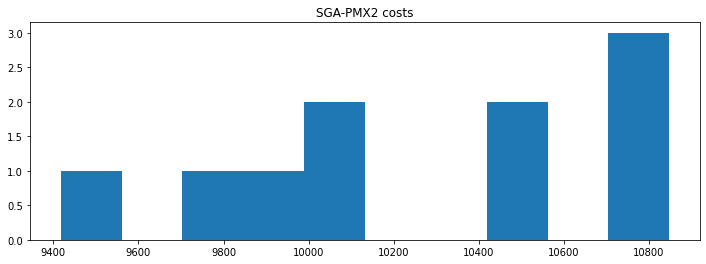

In [79]:
results=np.zeros(10)
print("SGA-PMX2:")
population_size = 500
chromosome_length = n
number_of_offspring = population_size
crossover_probability = 0.95
mutation_probability = 0.25
number_of_iterations = 250
for i in range(10):
    best_res, best_perm, duration = SGA_PMX2(population_size, chromosome_length, number_of_offspring, crossover_probability, mutation_probability, number_of_iterations)
    print(f"Permutation {best_perm} gives value {best_res} in time {duration}")
    results[i]=best_res
plt.figure(figsize=(12,4))
plt.title("SGA-PMX2 costs")
plt.hist(results)
plt.show()

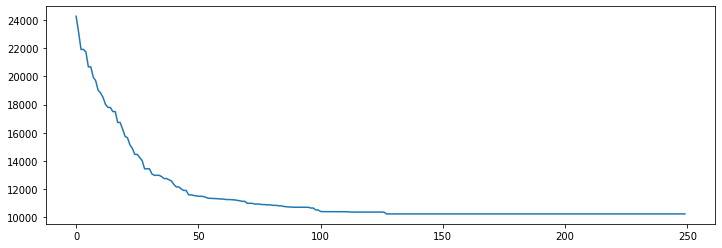

(10220.022371298988,
 array([35, 38, 44, 31, 48, 34, 33, 36, 43, 45, 25, 12, 13, 46, 24, 18,  7,
        32, 50, 10, 51, 26, 27, 11,  3,  5, 23, 47, 39, 37,  4, 14, 42,  9,
         8, 40,  2, 16, 20, 41,  6,  1, 29, 28, 15, 49, 19, 22, 30, 17, 21,
         0], dtype=int64),
 22.532034873962402)

In [57]:
SGA_PMX2(population_size, chromosome_length, number_of_offspring, crossover_probability, mutation_probability, number_of_iterations, with_chart=True)

Podpunkt e

In [80]:
def bayg29_read_input():
    global n, A
    n=29
    A=np.zeros((n,n))
    bayg29_weights="""97 205 139  86  60 220  65 111 115 227  95  82 225 168 103 266 205 149 120  58 257 152  52 180 136  82  34 145 
    129 103  71 105 258 154 112  65 204 150  87 176 137 142 204 148 148  49  41 211 226 116 197  89 153 124  74
    219 125 175 386 269 134 184 313 201 215 267 248 271 274 236 272 160 151 300 350 239 322  78 276 220  60
    167 182 180 162 208  39 102 227  60  86  34  96 129  69  58  60 120 119 192 114 110 192 136 173 173
     51 296 150  42 131 268  88 131 245 201 175 275 218 202 119  50 281 238 131 244  51 166  95  69
    279 114  56 150 278  46 133 266 214 162 302 242 203 146  67 300 205 111 238  98 139  52 120
    178 328 206 147 308 172 203 165 121 251 216 122 231 249 209 111 169  72 338 144 237 331
    169 151 227 133 104 242 182  84 290 230 146 165 121 270  91  48 158 200  39  64 210
    172 309  68 169 286 242 208 315 259 240 160  90 322 260 160 281  57 192 107  90
    140 195  51 117  72 104 153  93  88  25  85 152 200 104 139 154 134 149 135
    320 146  64  68 143 106  88  81 159 219  63 216 187  88 293 191 258 272
    174 311 258 196 347 288 243 192 113 345 222 144 274 124 165  71 153
    144  86  57 189 128  71  71  82 176 150  56 114 168  83 115 160
     61 165  51  32 105 127 201  36 254 196 136 260 212 258 234
    106 110  56  49  91 153  91 197 136  94 225 151 201 205
    215 159  64 126 128 190  98  53  78 218  48 127 214
     61 155 157 235  47 305 243 186 282 261 300 252
    105 100 176  66 253 183 146 231 203 239 204
    113 152 127 150 106  52 235 112 179 221
     79 163 220 119 164 135 152 153 114
    236 201  90 195  90 127  84  91
    273 226 148 296 238 291 269
    112 130 286  74 155 291
    130 178  38  75 180
    281 120 205 270
    213 145  36
     94 217
    162""".split()
    print(len(bayg29_weights))
    weight_idx=0
    for i in range(n):
        for j in range(i+1, n):
            assert weight_idx < 406
            A[i, j]= bayg29_weights[weight_idx]
            A[j, i]= bayg29_weights[weight_idx]
            weight_idx += 1

For bayg29:
406
Permutation [12 15 22  6 24 18 14 10 13 21 16 17  3  9 19  1 20  4 28  2 25  8 11  5
 27  0  7 26 23] gives value 1650.0 in time 22.253987789154053
Permutation [ 0 27  5 11  8  4 25  2 28 20  1 19  9 12  3 14 17 13 16 21 10 18 24  6
 22  7 26 15 23] gives value 1630.0 in time 21.03200054168701
Permutation [19  9  3 17 13 16 21 10 14 18 15 24  6 22 26  7 23  0 27  5 11  8  4 25
  2 28  1 20 12] gives value 1680.0 in time 21.46000051498413
Permutation [18 24  6 22 26 15 12 23  7  0 27  5 11  8  4 25  2 28 20  1 19  9  3 14
 17 13 16 21 10] gives value 1623.0 in time 22.170995712280273
Permutation [ 6 22  7 27 11  5  0 23 26 15 12 20  4  8 25  2 28  1 19  9  3 17 13 16
 21 10 14 18 24] gives value 1697.0 in time 20.7319974899292
Permutation [27  5 11  8 25  2 28  4 20  1 19  9 12  3 14 17 13 16 21 10 18 24  6 22
 15 23 26  7  0] gives value 1632.0 in time 16.25499677658081
Permutation [ 8  4 25  2 28  1 19  9  3 17 13 16 21 10 14 18 15 24  6 22 26  7 23 12
 20  0 27  5 11]

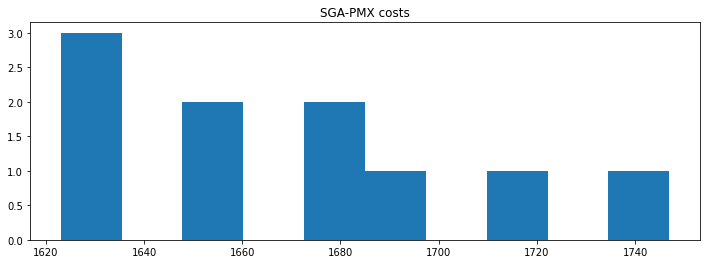

Permutation [10 13 21 16 17  9 19  1 20  4 28  2 25  8 23 26  7 27 11  5  0 12 18 24
  6 22 15  3 14] gives value 1892.0 in time 16.07500386238098
Permutation [ 3  9 19 28  2 25  8  4  1 20 23 12 18 15 26  0  5 11 27  7 22  6 24 10
 13 21 16 17 14] gives value 1839.0 in time 17.65499472618103
Permutation [ 9  3 14 18 24 10 21 16 13 17 15  6 22  7 27  5 11  8 25  4 20  0 23 26
 12  1 28  2 19] gives value 1962.0 in time 16.258995056152344
Permutation [22  6 24 18 10 21 16 13 17  9 19 28  2 25  8 11 27  5  4  1 20  0 23 12
  3 14 15 26  7] gives value 1834.0 in time 15.78699803352356
Permutation [ 9  3 14 17 16 21 13 10  6 24 18  4 28  2 25  8 11  5 27  7 26 22 15 12
 23  0 20  1 19] gives value 1853.0 in time 14.728002309799194
Permutation [17 13  3 15 26 22  6 24 18 14 10 21 16  1 20  4  8 25  2 28  5 11 27  0
  7 23 12  9 19] gives value 1946.0 in time 16.233004808425903
Permutation [23 22  6 24 10 18 15 26  7  0 27  5 11  8  4 20  9 19  1 25 28  2 17 16
 21 13 14  3 12] gives value 1

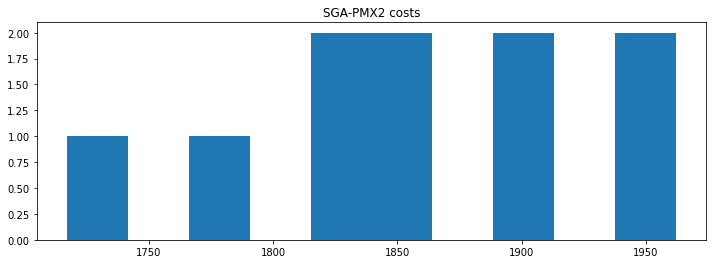

In [81]:
results=np.zeros(10)
print("For bayg29:")
bayg29_read_input()
population_size = 500
chromosome_length = n
number_of_offspring = population_size
crossover_probability = 0.95
mutation_probability = 0.25
number_of_iterations = 250
for i in range(10):
    best_res, best_perm, duration = SGA_PMX(population_size, chromosome_length, number_of_offspring, crossover_probability, mutation_probability, number_of_iterations)
    print(f"Permutation {best_perm} gives value {best_res} in time {duration}")
    results[i]=best_res
plt.figure(figsize=(12,4))
plt.title("SGA-PMX costs")
plt.hist(results)
plt.show()
results=np.zeros(10)
for i in range(10):
    best_res, best_perm, duration = SGA_PMX2(population_size, chromosome_length, number_of_offspring, crossover_probability, mutation_probability, number_of_iterations)
    print(f"Permutation {best_perm} gives value {best_res} in time {duration}")
    results[i]=best_res
plt.figure(figsize=(12,4))
plt.title("SGA-PMX2 costs")
plt.hist(results)
plt.show()

In [84]:
def bays29_read_input():
    global n, A
    n=29
    A=np.zeros((n,n))
    bays29_weights=""" 0 107 241 190 124  80 316  76 152 157 283 133 113 297 228 129 348 276 188 150  65 341 184  67 221 169 108  45 167
     107   0 148 137  88 127 336 183 134  95 254 180 101 234 175 176 265 199 182  67  42 278 271 146 251 105 191 139  79
     241 148   0 374 171 259 509 317 217 232 491 312 280 391 412 349 422 356 355 204 182 435 417 292 424 116 337 273  77
     190 137 374   0 202 234 222 192 248  42 117 287  79 107  38 121 152  86  68  70 137 151 239 135 137 242 165 228 205
     124  88 171 202   0  61 392 202  46 160 319 112 163 322 240 232 314 287 238 155  65 366 300 175 307  57 220 121  97
      80 127 259 234  61   0 386 141  72 167 351  55 157 331 272 226 362 296 232 164  85 375 249 147 301 118 188  60 185
     316 336 509 222 392 386   0 233 438 254 202 439 235 254 210 187 313 266 154 282 321 298 168 249  95 437 190 314 435
      76 183 317 192 202 141 233   0 213 188 272 193 131 302 233  98 344 289 177 216 141 346 108  57 190 245  43  81 243
     152 134 217 248  46  72 438 213   0 206 365  89 209 368 286 278 360 333 284 201 111 412 321 221 353  72 266 132 111
     157  95 232  42 160 167 254 188 206   0 159 220  57 149  80 132 193 127 100  28  95 193 241 131 169 200 161 189 163
     283 254 491 117 319 351 202 272 365 159   0 404 176 106  79 161 165 141  95 187 254 103 279 215 117 359 216 308 322
     133 180 312 287 112  55 439 193  89 220 404   0 210 384 325 279 415 349 285 217 138 428 310 200 354 169 241 112 238
     113 101 280  79 163 157 235 131 209  57 176 210   0 186 117  75 231 165  81  85  92 230 184  74 150 208 104 158 206
     297 234 391 107 322 331 254 302 368 149 106 384 186   0  69 191  59  35 125 167 255  44 309 245 169 327 246 335 288
     228 175 412  38 240 272 210 233 286  80  79 325 117  69   0 122 122  56  56 108 175 113 240 176 125 280 177 266 243
     129 176 349 121 232 226 187  98 278 132 161 279  75 191 122   0 244 178  66 160 161 235 118  62  92 277  55 155 275
     348 265 422 152 314 362 313 344 360 193 165 415 231  59 122 244   0  66 178 198 286  77 362 287 228 358 299 380 319
     276 199 356  86 287 296 266 289 333 127 141 349 165  35  56 178  66   0 112 132 220  79 296 232 181 292 233 314 253
     188 182 355  68 238 232 154 177 284 100  95 285  81 125  56  66 178 112   0 128 167 169 179 120  69 283 121 213 281
     150  67 204  70 155 164 282 216 201  28 187 217  85 167 108 160 198 132 128   0  88 211 269 159 197 172 189 182 135
      65  42 182 137  65  85 321 141 111  95 254 138  92 255 175 161 286 220 167  88   0 299 229 104 236 110 149  97 108
     341 278 435 151 366 375 298 346 412 193 103 428 230  44 113 235  77  79 169 211 299   0 353 289 213 371 290 379 332
     184 271 417 239 300 249 168 108 321 241 279 310 184 309 240 118 362 296 179 269 229 353   0 121 162 345  80 189 342
      67 146 292 135 175 147 249  57 221 131 215 200  74 245 176  62 287 232 120 159 104 289 121   0 154 220  41  93 218
     221 251 424 137 307 301  95 190 353 169 117 354 150 169 125  92 228 181  69 197 236 213 162 154   0 352 147 247 350
     169 105 116 242  57 118 437 245  72 200 359 169 208 327 280 277 358 292 283 172 110 371 345 220 352   0 265 178  39
     108 191 337 165 220 188 190  43 266 161 216 241 104 246 177  55 299 233 121 189 149 290  80  41 147 265   0 124 263
      45 139 273 228 121  60 314  81 132 189 308 112 158 335 266 155 380 314 213 182  97 379 189  93 247 178 124   0 199
     167  79  77 205  97 185 435 243 111 163 322 238 206 288 243 275 319 253 281 135 108 332 342 218 350  39 263 199   0""".split()
    print(len(bays29_weights))
    A=np.asarray([int(x) for x in bays29_weights]).reshape((29, 29))
    print(A)

For bays29:
841
[[  0 107 241 190 124  80 316  76 152 157 283 133 113 297 228 129 348 276
  188 150  65 341 184  67 221 169 108  45 167]
 [107   0 148 137  88 127 336 183 134  95 254 180 101 234 175 176 265 199
  182  67  42 278 271 146 251 105 191 139  79]
 [241 148   0 374 171 259 509 317 217 232 491 312 280 391 412 349 422 356
  355 204 182 435 417 292 424 116 337 273  77]
 [190 137 374   0 202 234 222 192 248  42 117 287  79 107  38 121 152  86
   68  70 137 151 239 135 137 242 165 228 205]
 [124  88 171 202   0  61 392 202  46 160 319 112 163 322 240 232 314 287
  238 155  65 366 300 175 307  57 220 121  97]
 [ 80 127 259 234  61   0 386 141  72 167 351  55 157 331 272 226 362 296
  232 164  85 375 249 147 301 118 188  60 185]
 [316 336 509 222 392 386   0 233 438 254 202 439 235 254 210 187 313 266
  154 282 321 298 168 249  95 437 190 314 435]
 [ 76 183 317 192 202 141 233   0 213 188 272 193 131 302 233  98 344 289
  177 216 141 346 108  57 190 245  43  81 243]
 [152 134 217 24

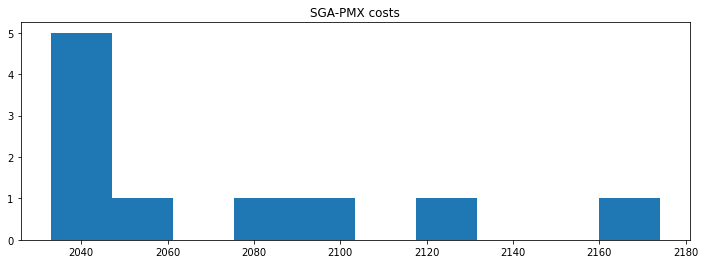

Permutation [12 15 18  9  3 14 17 16 13 21 10 24  6 22 26  7 27  5  4 20 19  1  2 28
 25  8 11  0 23] gives value 2273.0 in time 16.852996826171875
Permutation [13 21 10 18 15 24  6 22 26  7 23 12  9 19 20  1  2 28 25  4  8 11  5 27
  0  3 14 17 16] gives value 2157.0 in time 16.848005294799805
Permutation [19  9  3 12 18 10 21 13 16 17 14 24  6 22  7 26 15 23  2 28 25  4  8 11
  5 27  0 20  1] gives value 2243.0 in time 15.47899341583252
Permutation [26 22  6 24 15 18 14 10 21 13 16 17  3  9 19 20  0 23  7 27  5 11  8  4
 25 28  2  1 12] gives value 2198.0 in time 16.800000429153442
Permutation [13 16 17 14  3  9 12 23  0 20 19  1  2 28 25  4  8 11  5 27  7 26 22 15
 18  6 24 10 21] gives value 2151.0 in time 16.291005849838257
Permutation [18 24  6 22 26 15 12  9 19  1  2 28 20  0 23  7 27  5 11  8 25  4  3 17
 16 13 21 10 14] gives value 2325.0 in time 16.788994789123535
Permutation [12  9  3 14 13 21 16 17 19  1  2 28  0 26 22  7 27  5 11  8 25  4 20 23
 15 24  6 10 18] gives value

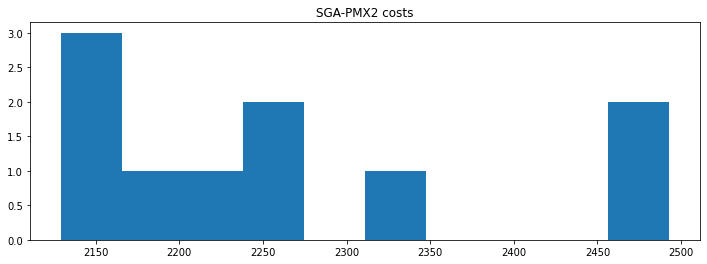

In [85]:
results=np.zeros(10)
print("For bays29:")
bays29_read_input()
population_size = 500
chromosome_length = n
number_of_offspring = population_size
crossover_probability = 0.95
mutation_probability = 0.25
number_of_iterations = 250
for i in range(10):
    best_res, best_perm, duration = SGA_PMX(population_size, chromosome_length, number_of_offspring, crossover_probability, mutation_probability, number_of_iterations)
    print(f"Permutation {best_perm} gives value {best_res} in time {duration}")
    results[i]=best_res
plt.figure(figsize=(12,4))
plt.title("SGA-PMX costs")
plt.hist(results)
plt.show()
results=np.zeros(10)
for i in range(10):
    best_res, best_perm, duration = SGA_PMX2(population_size, chromosome_length, number_of_offspring, crossover_probability, mutation_probability, number_of_iterations)
    print(f"Permutation {best_perm} gives value {best_res} in time {duration}")
    results[i]=best_res
plt.figure(figsize=(12,4))
plt.title("SGA-PMX2 costs")
plt.hist(results)
plt.show()

In [88]:
def kroA100_read_input():
    global n
    n=100
    kroA100=[s.split()[1:] for s in """1 1380 939
    2 2848 96
    3 3510 1671
    4 457 334
    5 3888 666
    6 984 965
    7 2721 1482
    8 1286 525
    9 2716 1432
    10 738 1325
    11 1251 1832
    12 2728 1698
    13 3815 169
    14 3683 1533
    15 1247 1945
    16 123 862
    17 1234 1946
    18 252 1240
    19 611 673
    20 2576 1676
    21 928 1700
    22 53 857
    23 1807 1711
    24 274 1420
    25 2574 946
    26 178 24
    27 2678 1825
    28 1795 962
    29 3384 1498
    30 3520 1079
    31 1256 61
    32 1424 1728
    33 3913 192
    34 3085 1528
    35 2573 1969
    36 463 1670
    37 3875 598
    38 298 1513
    39 3479 821
    40 2542 236
    41 3955 1743
    42 1323 280
    43 3447 1830
    44 2936 337
    45 1621 1830
    46 3373 1646
    47 1393 1368
    48 3874 1318
    49 938 955
    50 3022 474
    51 2482 1183
    52 3854 923
    53 376 825
    54 2519 135
    55 2945 1622
    56 953 268
    57 2628 1479
    58 2097 981
    59 890 1846
    60 2139 1806
    61 2421 1007
    62 2290 1810
    63 1115 1052
    64 2588 302
    65 327 265
    66 241 341
    67 1917 687
    68 2991 792
    69 2573 599
    70 19 674
    71 3911 1673
    72 872 1559
    73 2863 558
    74 929 1766
    75 839 620
    76 3893 102
    77 2178 1619
    78 3822 899
    79 378 1048
    80 1178 100
    81 2599 901
    82 3416 143
    83 2961 1605
    84 611 1384
    85 3113 885
    86 2597 1830
    87 2586 1286
    88 161 906
    89 1429 134
    90 742 1025
    91 1625 1651
    92 1187 706
    93 1787 1009
    94 22 987
    95 3640 43
    96 3756 882
    97 776 392
    98 1724 1642
    99 198 1810
    100 3950 1558""".split("\n")]
    read_input(n, np.asarray([[int(coords[0]), int(coords[1])] for coords in kroA100]))

For kroA100:
Problem size: 100
Distance matrix:
 [[   0.         1692.82987923 2252.27085405 ...  782.65254104
  1468.2523625  2643.49408927]
 [1692.82987923    0.         1708.46978317 ... 1911.41099714
  3155.99366286 1830.8052873 ]
 [2252.27085405 1708.46978317    0.         ... 1786.23542681
  3314.91553437  454.27854891]
 ...
 [ 782.65254104 1911.41099714 1786.23542681 ...    0.
  1535.21985396 2227.58434184]
 [1468.2523625  3155.99366286 3314.91553437 ... 1535.21985396
     0.         3760.45316418]
 [2643.49408927 1830.8052873   454.27854891 ... 2227.58434184
  3760.45316418    0.        ]]
Permutation [22 90 31 10 71 46  0 91  7 41 88 30 79 55 25 65 69 21 15 93 78 87 52 18
 96  3 64 74 62  5 48 89  9 83 17 23 37 98 35 20 58 73 16 14 44 97 76 19
 56  6  8 86 50 80 24 60 57 92 27 66 68 43  1 53 39 63 72 67 84 49 81 94
 12 75 32  4 36 38 29 95 51 77 47 99 40 70 13 28  2 42 45 33 54 82 11 26
 34 85 61 59] gives value 25518.72059367808 in time 40.30199646949768
Permutation [61 59 22

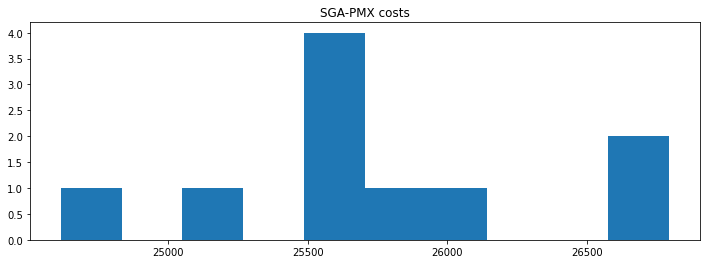

Permutation [74 18 71 20 73 35 98 37 23 93 78 14 16 58 10 76 28 47 13  2 45 42 26 31
 46 62  5 48 91 53 39 63 57 90 44 97 22 59 61 34 85 19 56 86 50 60 88 30
 79 55  3 25 64 65 69 15 21 87 52 41  1 43 72 80 24 27 92  9 83 17 89  0
 66 68 11 54 82 33 29 51 77 95 94 81 49 67  8  6 84 38  4 36 12 75 32 99
 70 40  7 96] gives value 43429.27982212659 in time 34.571998834609985
Permutation [84 67  8  6 59 89 78 87 93 21 15 69 65 52 18 91 66 63 45 13  2 42 54 11
 26 34 61 22 97 90 46 62  5 71 20 73 31 85 47 99 70 40 58 35 98 37 23 17
 83  9  0 92 27 10 16 14 44 76 19 56 86 24 80 68 72 94 12 75 32 51 77 95
 29 28 33 82 57 48 74 96 55  7 60 50 38  4 36  1 53 41  3 64 25 79 30 88
 39 43 81 49] gives value 45431.36892892152 in time 35.88999938964844
Permutation [21 87 52  0 56 42  2 28  8  6 76 59 44 31 10 73 20 46 39 63 72 49 67 84
 38 29 95 51 77 47 99 40 70 13 45 33 82 54 11 19 80 68 30 79 55 96  3 18
 74  5 48 89 78 17 83  9 71 92 27 91  7 88 41 53  1 43 81 94 12 75 32 36
  4 86 50 66 64 25 6

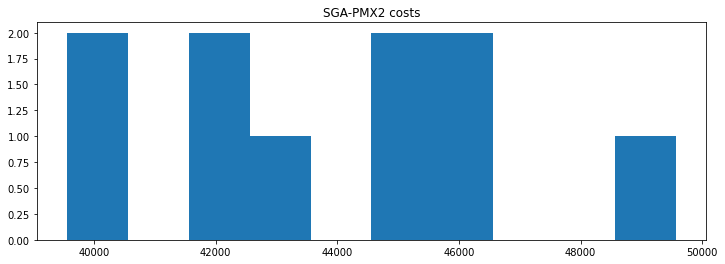

In [90]:
results=np.zeros(10)
print("For kroA100:")
kroA100_read_input()
population_size = 500
chromosome_length = n
number_of_offspring = population_size
crossover_probability = 0.95
mutation_probability = 0.25
number_of_iterations = 250
for i in range(10):
    best_res, best_perm, duration = SGA_PMX(population_size, chromosome_length, number_of_offspring, crossover_probability, mutation_probability, number_of_iterations)
    print(f"Permutation {best_perm} gives value {best_res} in time {duration}")
    results[i]=best_res
plt.figure(figsize=(12,4))
plt.title("SGA-PMX costs")
plt.hist(results)
plt.show()
results=np.zeros(10)
for i in range(10):
    best_res, best_perm, duration = SGA_PMX2(population_size, chromosome_length, number_of_offspring, crossover_probability, mutation_probability, number_of_iterations)
    print(f"Permutation {best_perm} gives value {best_res} in time {duration}")
    results[i]=best_res
plt.figure(figsize=(12,4))
plt.title("SGA-PMX2 costs")
plt.hist(results)
plt.show()

In [91]:
def kroA150_read_input():
    global n
    n=150
    kroA150=[s.split()[1:] for s in """1 1380 939
    2 2848 96
    3 3510 1671
    4 457 334
    5 3888 666
    6 984 965
    7 2721 1482
    8 1286 525
    9 2716 1432
    10 738 1325
    11 1251 1832
    12 2728 1698
    13 3815 169
    14 3683 1533
    15 1247 1945
    16 123 862
    17 1234 1946
    18 252 1240
    19 611 673
    20 2576 1676
    21 928 1700
    22 53 857
    23 1807 1711
    24 274 1420
    25 2574 946
    26 178 24
    27 2678 1825
    28 1795 962
    29 3384 1498
    30 3520 1079
    31 1256 61
    32 1424 1728
    33 3913 192
    34 3085 1528
    35 2573 1969
    36 463 1670
    37 3875 598
    38 298 1513
    39 3479 821
    40 2542 236
    41 3955 1743
    42 1323 280
    43 3447 1830
    44 2936 337
    45 1621 1830
    46 3373 1646
    47 1393 1368
    48 3874 1318
    49 938 955
    50 3022 474
    51 2482 1183
    52 3854 923
    53 376 825
    54 2519 135
    55 2945 1622
    56 953 268
    57 2628 1479
    58 2097 981
    59 890 1846
    60 2139 1806
    61 2421 1007
    62 2290 1810
    63 1115 1052
    64 2588 302
    65 327 265
    66 241 341
    67 1917 687
    68 2991 792
    69 2573 599
    70 19 674
    71 3911 1673
    72 872 1559
    73 2863 558
    74 929 1766
    75 839 620
    76 3893 102
    77 2178 1619
    78 3822 899
    79 378 1048
    80 1178 100
    81 2599 901
    82 3416 143
    83 2961 1605
    84 611 1384
    85 3113 885
    86 2597 1830
    87 2586 1286
    88 161 906
    89 1429 134
    90 742 1025
    91 1625 1651
    92 1187 706
    93 1787 1009
    94 22 987
    95 3640 43
    96 3756 882
    97 776 392
    98 1724 1642
    99 198 1810
    100 3950 1558
    101 3477 949
    102 91 1732
    103 3972 329
    104 198 1632
    105 1806 733
    106 538 1023
    107 3430 1088
    108 2186 766
    109 1513 1646
    110 2143 1611
    111 53 1657
    112 3404 1307
    113 1034 1344
    114 2823 376
    115 3104 1931
    116 3232 324
    117 2790 1457
    118 374 9
    119 741 146
    120 3083 1938
    121 3502 1067
    122 1280 237
    123 3326 1846
    124 217 38
    125 2503 1172
    126 3527 41
    127 739 1850
    128 3548 1999
    129 48 154
    130 1419 872
    131 1689 1223
    132 3468 1404
    133 1628 253
    134 382 872
    135 3029 1242
    136 3646 1758
    137 285 1029
    138 1782 93
    139 1067 371
    140 2849 1214
    141 920 1835
    142 1741 712
    143 876 220
    144 2753 283
    145 2609 1286
    146 3941 258
    147 3613 523
    148 1754 559
    149 2916 1724
    150 2445 1820""".split("\n")]
    read_input(n, np.asarray([[int(coords[0]), int(coords[1])] for coords in kroA150]))

For kroA150:
Problem size: 150
Distance matrix:
 [[   0.         1692.82987923 2252.27085405 ...  533.17539328
  1724.96985481 1382.16713895]
 [1692.82987923    0.         1708.46978317 ... 1187.94149688
  1629.41952854 1770.47592472]
 [2252.27085405 1708.46978317    0.         ... 2078.480214
   596.35979073 1075.3724936 ]
 ...
 [ 533.17539328 1187.94149688 2078.480214   ...    0.
  1645.43884724 1437.91585289]
 [1724.96985481 1629.41952854  596.35979073 ... 1645.43884724
     0.          480.68388781]
 [1382.16713895 1770.47592472 1075.3724936  ... 1437.91585289
   480.68388781    0.        ]]
Permutation [ 40 135   2 122 127  42  45 119 114  26  86  24  43  49  81  67  54  19
  76  57  66 141 104  53 147 137 132  88  30  79 123  25 117 118   3  64
 128  65  69  15  87 136  93  21 142  74   5  62   0  46 130 108  14  20
  73 126  58 112 140  83   9 105  17  78 133  52  18  48  55  96 138 121
  41   7  91 129  89  71  98  35  37  23 101 110 103  16  10  31  90  44
  61 149  85  34  56

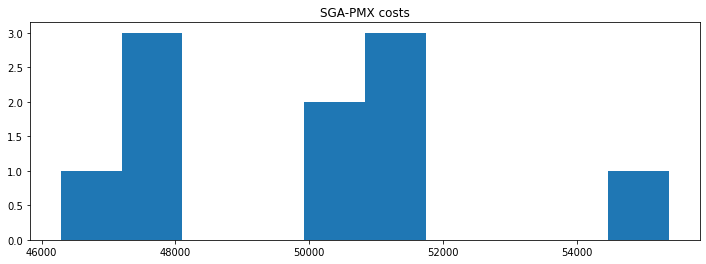

Permutation [  7 121 132 137   1 125  94 143  53 104 141  92  27 130  97  22  89  65
  64 123   3  79  39  72  67 100  29 120 106 134  55 142  96 147  54  26
  76  46  48  74  66  60 124 116   6  19 109  69 128  25 117 118 107  50
   0 105 133  87  21  93  73  10  31  44  86 144   8  56  20 112  62  57
 139 119  34  85  11  82  24  80  68  63 113  49  84  33  42 131  95  47
  99  70  40  13  38 146 145  75  12 115  43  59 149 111  77  51  36   4
 102  32  81  18  52 136  83   9  35  98 103  37  23  17  78 140  14  16
 108  90  61 114 148 122 127 135   2  45  28  71 101 110  15 138  30  88
  41  91  58 126   5 129] gives value 75069.03490728422 in time 50.25801086425781
Permutation [101  37  23  17  93  87  69  65  64 128  25 123 117   3  81 125  94  49
  72   9 105  96  55  30   1 143 149  59 130  91   7 147  66 139 134  28
   2  40  47  29  78 136  35 126 140  31 108 109  76  61  56 113  63  79
  52  21  15 133  18  74 118 142 138  89  58  73  20 112 129   0 141  60
  84 111 131  44  

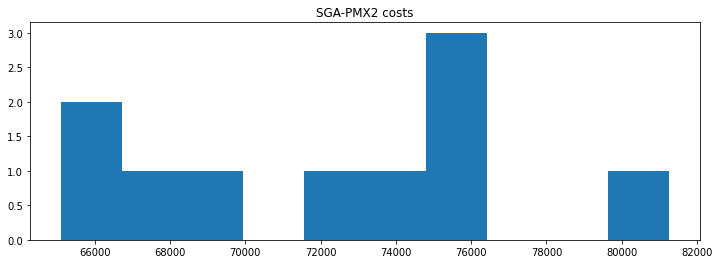

In [92]:
results=np.zeros(10)
print("For kroA150:")
kroA150_read_input()
population_size = 500
chromosome_length = n
number_of_offspring = population_size
crossover_probability = 0.95
mutation_probability = 0.25
number_of_iterations = 250
for i in range(10):
    best_res, best_perm, duration = SGA_PMX(population_size, chromosome_length, number_of_offspring, crossover_probability, mutation_probability, number_of_iterations)
    print(f"Permutation {best_perm} gives value {best_res} in time {duration}")
    results[i]=best_res
plt.figure(figsize=(12,4))
plt.title("SGA-PMX costs")
plt.hist(results)
plt.show()
results=np.zeros(10)
for i in range(10):
    best_res, best_perm, duration = SGA_PMX2(population_size, chromosome_length, number_of_offspring, crossover_probability, mutation_probability, number_of_iterations)
    print(f"Permutation {best_perm} gives value {best_res} in time {duration}")
    results[i]=best_res
plt.figure(figsize=(12,4))
plt.title("SGA-PMX2 costs")
plt.hist(results)
plt.show()

In [93]:
def kroA200_read_input():
    global n
    n=200
    kroA200=[s.split()[1:] for s in """1 1357 1905
    2 2650 802
    3 1774 107
    4 1307 964
    5 3806 746
    6 2687 1353
    7 43 1957
    8 3092 1668
    9 185 1542
    10 834 629
    11 40 462
    12 1183 1391
    13 2048 1628
    14 1097 643
    15 1838 1732
    16 234 1118
    17 3314 1881
    18 737 1285
    19 779 777
    20 2312 1949
    21 2576 189
    22 3078 1541
    23 2781 478
    24 705 1812
    25 3409 1917
    26 323 1714
    27 1660 1556
    28 3729 1188
    29 693 1383
    30 2361 640
    31 2433 1538
    32 554 1825
    33 913 317
    34 3586 1909
    35 2636 727
    36 1000 457
    37 482 1337
    38 3704 1082
    39 3635 1174
    40 1362 1526
    41 2049 417
    42 2552 1909
    43 3939 640
    44 219 898
    45 812 351
    46 901 1552
    47 2513 1572
    48 242 584
    49 826 1226
    50 3278 799
    51 86 1065
    52 14 454
    53 1327 1893
    54 2773 1286
    55 2469 1838
    56 3835 963
    57 1031 428
    58 3853 1712
    59 1868 197
    60 1544 863
    61 457 1607
    62 3174 1064
    63 192 1004
    64 2318 1925
    65 2232 1374
    66 396 828
    67 2365 1649
    68 2499 658
    69 1410 307
    70 2990 214
    71 3646 1018
    72 3394 1028
    73 1779 90
    74 1058 372
    75 2933 1459
    76 3099 173
    77 2178 978
    78 138 1610
    79 2082 1753
    80 2302 1127
    81 805 272
    82 22 1617
    83 3213 1085
    84 99 536
    85 1533 1780
    86 3564 676
    87 29 6
    88 3808 1375
    89 2221 291
    90 3499 1885
    91 3124 408
    92 781 671
    93 1027 1041
    94 3249 378
    95 3297 491
    96 213 220
    97 721 186
    98 3736 1542
    99 868 731
    100 960 303
    101 1380 939
    102 2848 96
    103 3510 1671
    104 457 334
    105 3888 666
    106 984 965
    107 2721 1482
    108 1286 525
    109 2716 1432
    110 738 1325
    111 1251 1832
    112 2728 1698
    113 3815 169
    114 3683 1533
    115 1247 1945
    116 123 862
    117 1234 1946
    118 252 1240
    119 611 673
    120 2576 1676
    121 928 1700
    122 53 857
    123 1807 1711
    124 274 1420
    125 2574 946
    126 178 24
    127 2678 1825
    128 1795 962
    129 3384 1498
    130 3520 1079
    131 1256 61
    132 1424 1728
    133 3913 192
    134 3085 1528
    135 2573 1969
    136 463 1670
    137 3875 598
    138 298 1513
    139 3479 821
    140 2542 236
    141 3955 1743
    142 1323 280
    143 3447 1830
    144 2936 337
    145 1621 1830
    146 3373 1646
    147 1393 1368
    148 3874 1318
    149 938 955
    150 3022 474
    151 2482 1183
    152 3854 923
    153 376 825
    154 2519 135
    155 2945 1622
    156 953 268
    157 2628 1479
    158 2097 981
    159 890 1846
    160 2139 1806
    161 2421 1007
    162 2290 1810
    163 1115 1052
    164 2588 302
    165 327 265
    166 241 341
    167 1917 687
    168 2991 792
    169 2573 599
    170 19 674
    171 3911 1673
    172 872 1559
    173 2863 558
    174 929 1766
    175 839 620
    176 3893 102
    177 2178 1619
    178 3822 899
    179 378 1048
    180 1178 100
    181 2599 901
    182 3416 143
    183 2961 1605
    184 611 1384
    185 3113 885
    186 2597 1830
    187 2586 1286
    188 161 906
    189 1429 134
    190 742 1025
    191 1625 1651
    192 1187 706
    193 1787 1009
    194 22 987
    195 3640 43
    196 3756 882
    197 776 392
    198 1724 1642
    199 198 1810
    200 3950 1558""".split("\n")]
    read_input(n, np.asarray([[int(coords[0]), int(coords[1])] for coords in kroA200]))

For kroA200:
Problem size: 200
Distance matrix:
 [[   0.         1699.54641008 1845.72289361 ...  451.50636762
  1162.88692486 2616.11505863]
 [1699.54641008    0.         1118.21330702 ... 1250.23037877
  2651.10693862 1503.84041707]
 [1845.72289361 1118.21330702    0.         ... 1535.81411636
  2320.34156968 2615.41143991]
 ...
 [ 451.50636762 1250.23037877 1535.81411636 ...    0.
  1535.21985396 2227.58434184]
 [1162.88692486 2651.10693862 2320.34156968 ... 1535.21985396
     0.         3760.45316418]
 [2616.11505863 1503.84041707 2615.41143991 ... 2227.58434184
  3760.45316418    0.        ]]
Permutation [ 84 158 135  60  31  25 137  77   6 198   8  81  17 107  44 196 155  68
 130 188  88  40  76  46 119  66  64  30 134  19  63  78  26 148 105  92
 162  13  98  32  73  35 118  18   9  91  65  50 187 121  15 193  83  95
  86 165 103 174  80 141  59  11  52 197 190 144 110 173 120  28  48  36
 117  23 171  45   0 116 131 114 122 159  14  39 100   3 109 189 183 178
 123 115 152 164 1

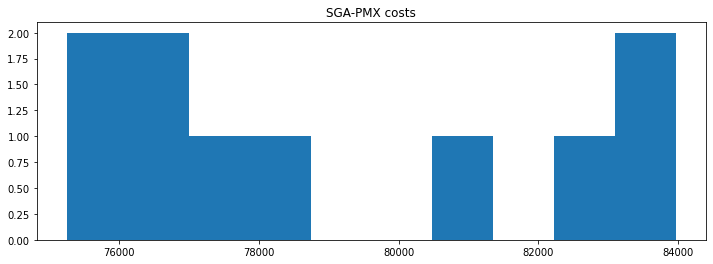

Permutation [ 69 101  20 139 168 191  13  39 131  84 119 154  82  75 181  55  87 147
 113  93 143  22  67 157  26  19 161  54  46 111 102 145  97 199 170 140
  57  33  24  78  48  92 148 164  95 196  80 187  43  15 178  94 151  70
  71 124 107  35  73  56 125  86 165  51  83 188  72  44  96 103 120 158
 162   3  29 167 138  37  89  16  74 100 189  28 137 123  77  25 194 112
 195 177  27  38  34 192  11 146 105 155 179 130  18  98 117   8  36  17
 185 126  63 134  41  14 173 198   6  88 172 149  90  49  53 156 106 176
  12  79 160  64 159 122  52   0 197  66  30 150 186 108   5   1 180  76
 127 190 144 114 116 110 182  21   7 133  68 141   2  40 109 135  81 193
 121  50 115 169  10 152  65  47  62 183 171  45  58 153  85 129 128 142
 104  42 132 175 136   4 184  61  59  91 118   9 174  99  32  60  31  23
 166 163] gives value 102597.8122904145 in time 64.30900287628174
Permutation [ 69 101 139  40 120 173  92 148  81   8 183  26  76  67   1 180  71  27
  37  55  70 113 147  87 170 185 1

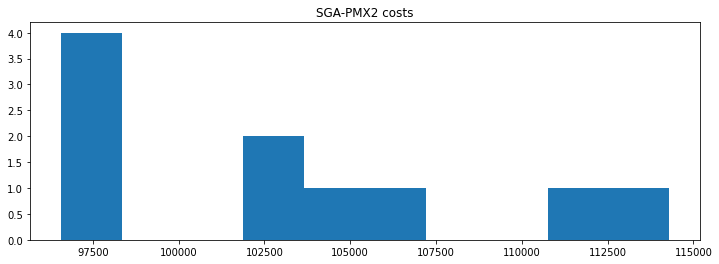

In [94]:
results=np.zeros(10)
print("For kroA200:")
kroA200_read_input()
population_size = 500
chromosome_length = n
number_of_offspring = population_size
crossover_probability = 0.95
mutation_probability = 0.25
number_of_iterations = 250
for i in range(10):
    best_res, best_perm, duration = SGA_PMX(population_size, chromosome_length, number_of_offspring, crossover_probability, mutation_probability, number_of_iterations)
    print(f"Permutation {best_perm} gives value {best_res} in time {duration}")
    results[i]=best_res
plt.figure(figsize=(12,4))
plt.title("SGA-PMX costs")
plt.hist(results)
plt.show()
results=np.zeros(10)
for i in range(10):
    best_res, best_perm, duration = SGA_PMX2(population_size, chromosome_length, number_of_offspring, crossover_probability, mutation_probability, number_of_iterations)
    print(f"Permutation {best_perm} gives value {best_res} in time {duration}")
    results[i]=best_res
plt.figure(figsize=(12,4))
plt.title("SGA-PMX2 costs")
plt.hist(results)
plt.show()

Zad.2

In [45]:
def OX(ind1, ind2):
    size = len(ind1)
    ancestor1 = np.full(size, -1)
    ancestor2 = np.full(size, -1)
    group_indices = np.random.choice(size, 2, False)
    group_begin, group_end = group_indices.min(), group_indices.max()
    ancestor1[group_begin:group_end+1]=ind1[group_begin:group_end+1]
    ancestor2[group_begin:group_end+1]=ind2[group_begin:group_end+1]
    first_ancestor_chain=[elem for elem in np.concatenate((ind2[group_end+1:], ind2[:group_end+1])) if elem not in ancestor1[group_begin:group_end+1]]
    second_ancestor_chain=[elem for elem in np.concatenate((ind1[group_end+1:], ind1[:group_end+1])) if elem not in ancestor2[group_begin:group_end+1]]
    #print(f"Indices: {group_begin}, {group_end}")
    for i in range(len(first_ancestor_chain)):
        ancestor1[(group_end+i+1) % size]=first_ancestor_chain[i]
        ancestor2[(group_end+i+1) % size]=second_ancestor_chain[i]
    assert len(set(ancestor1)) == size
    assert len(set(ancestor2)) == size
    return ancestor1, ancestor2
OX(np.asarray([1,2,3,4,5,6,7]), np.asarray([4,2,7,1,5,3,6]))

(array([2, 1, 3, 4, 5, 6, 7]), array([2, 4, 7, 1, 5, 3, 6]))

In [46]:
def SGA_OX(population_size, chromosome_length, number_of_offspring, crossover_probability, mutation_probability, number_of_iterations, with_chart=False):
    time0 = time.time()
    best_objective_value = np.Inf
    best_chromosome = np.zeros((1, chromosome_length))
    costs = np.zeros(number_of_iterations)
    # generating an initial population
    current_population = np.zeros((population_size, chromosome_length), dtype=np.int64)
    for i in range(population_size):
        current_population[i, :] = np.random.permutation(chromosome_length)

    # evaluating the objective function on the current population
    objective_values = np.zeros(population_size)
    for i in range(population_size):
        objective_values[i] = tsp_objective_function(current_population[i, :])

    for t in range(number_of_iterations):
    
        # selecting the parent indices by the roulette wheel method
        fitness_values = objective_values.max() - objective_values
        if fitness_values.sum() > 0:
            fitness_values = fitness_values / fitness_values.sum()
        else:
            fitness_values = np.ones(population_size) / population_size
        parent_indices = np.random.choice(population_size, number_of_offspring, True, fitness_values).astype(np.int64)

        # creating the children population
        children_population = np.zeros((number_of_offspring, chromosome_length), dtype=np.int64)
        for i in range(int(number_of_offspring/2)):
            if np.random.random() < crossover_probability:
                children_population[2*i, :], children_population[2*i+1, :] = OX(current_population[parent_indices[2*i], :].copy(), current_population[parent_indices[2*i+1], :].copy())
            else:
                children_population[2*i, :], children_population[2*i+1, :] = current_population[parent_indices[2*i], :].copy(), current_population[parent_indices[2*i+1]].copy()
        if np.mod(number_of_offspring, 2) == 1:
            children_population[-1, :] = current_population[parent_indices[-1], :]

        # mutating the children population
        for i in range(number_of_offspring):
            if np.random.random() < mutation_probability:
                children_population[i, :] = reverse_sequence_mutation(children_population[i, :])

        # evaluating the objective function on the children population
        children_objective_values = np.zeros(number_of_offspring)
        for i in range(number_of_offspring):
            children_objective_values[i] = tsp_objective_function(children_population[i, :])

        # replacing the current population by (Mu + Lambda) Replacement
        objective_values = np.hstack([objective_values, children_objective_values])
        current_population = np.vstack([current_population, children_population])

        I = np.argsort(objective_values)
        current_population = current_population[I[:population_size], :]
        objective_values = objective_values[I[:population_size]]

        best_idx=np.argmin(objective_values)
        # recording some statistics
        
        if best_objective_value > objective_values[best_idx]:
            best_objective_value = objective_values[best_idx]
            best_chromosome = current_population[best_idx, :]
        costs[t]=best_objective_value
    if with_chart:
        plt.figure(figsize=(12,4))
        plt.plot(costs)
        plt.show()
    return best_objective_value, best_chromosome, time.time() - time0

SGA-OX:
Permutation [19 22 29  1  6 41 20 16  2 17 30 21  0 48 31 44 18 40  7  8  9 32 42  3
  5 14  4 23 47 37 36 39 38 35 34 33 43 15 45 24 11 50 10 27 25 26 12 51
 13 46 28 49] gives value 8082.456060888523 in time 106.76799654960632
Permutation [ 6 41 20 16  2 17 30 21 18 40  7  8  9 44 31 48  0 43 33 34 35 38 39 36
 37 47 23  4 14  5  3 42 32 50 10 51 13 12 46 25 26 27 11 24 45 15 28 49
 19 22 29  1] gives value 8067.603587216511 in time 104.91200113296509
Permutation [22 19 49 43  0 21 30 17 16  2 40  8  9  7 18 44 31 48 34 33 35 38 39 36
 37 47 23  4  5 14 42 32 50 10 51 13 12 26 46 25 27 11  3 24 45 15 28 29
  1  6 41 20] gives value 8288.115729483598 in time 123.62999892234802
Permutation [ 8  9 42 32 50 11 10 51 13 12 46 25 26 27 24  3  5 14  4 23 47 37 36 39
 38 35 34 33 43 45 15 28 49 19 22 29 41  1  6 16  2 17 20 30 21  0 48 31
 44 18 40  7] gives value 7870.332836520736 in time 109.61699724197388
Permutation [44 18 40  7  8  9 32 42 14  3 11 50 10 51 13 12 46 25 26 27 24 

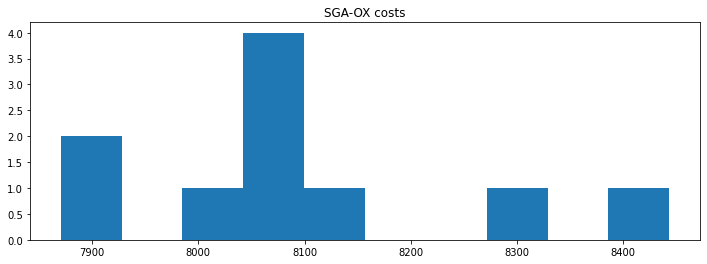

In [47]:
results=np.zeros(10)
print("SGA-OX:")
population_size = 500
chromosome_length = n
number_of_offspring = population_size
crossover_probability = 0.95
mutation_probability = 0.25
number_of_iterations = 250
for i in range(10):
    best_res, best_perm, duration = SGA_OX(population_size, chromosome_length, number_of_offspring, crossover_probability, mutation_probability, number_of_iterations)
    print(f"Permutation {best_perm} gives value {best_res} in time {duration}")
    results[i]=best_res
plt.figure(figsize=(12,4))
plt.title("SGA-OX costs")
plt.hist(results)
plt.show()

In [107]:
def CX(ind1, ind2):
    size = len(ind1)
    ancestor1 = np.full(size, -1)
    ancestor2 = np.full(size, -1)
    mapping_first_to_second={}
    mapping_second_to_first={}
    for first_elem, second_elem in zip(ind1, ind2):
        mapping_first_to_second[first_elem]=second_elem
        mapping_second_to_first[second_elem]=first_elem
    actual_cycle_elem=mapping_first_to_second[ind1[0]]
    cycle_elems=[ind1[0]]
    while(actual_cycle_elem != ind1[0]):
        cycle_elems.append(actual_cycle_elem)
        actual_cycle_elem=mapping_first_to_second[actual_cycle_elem]
    for i in range(size):
        if ind1[i] in cycle_elems:
            ancestor1[i]=ind1[i]
            ancestor2[i]=ind2[i]
        else:
            ancestor2[i]=ind1[i]
            ancestor1[i]=ind2[i]
    assert len(set(ancestor1)) == size
    assert len(set(ancestor2)) == size
    return ancestor1, ancestor2
CX([1,2,3,4,5,6,7,8,9],[4,1,2,8,7,6,9,3,5])

(array([1, 2, 3, 4, 7, 6, 9, 8, 5]), array([4, 1, 2, 8, 5, 6, 7, 3, 9]))

In [108]:
def SGA_CX(population_size, chromosome_length, number_of_offspring, crossover_probability, mutation_probability, number_of_iterations, with_chart=False):
    time0 = time.time()
    best_objective_value = np.Inf
    best_chromosome = np.zeros((1, chromosome_length))
    costs = np.zeros(number_of_iterations)
    # generating an initial population
    current_population = np.zeros((population_size, chromosome_length), dtype=np.int64)
    for i in range(population_size):
        current_population[i, :] = np.random.permutation(chromosome_length)

    # evaluating the objective function on the current population
    objective_values = np.zeros(population_size)
    for i in range(population_size):
        objective_values[i] = tsp_objective_function(current_population[i, :])

    for t in range(number_of_iterations):
    
        # selecting the parent indices by the roulette wheel method
        fitness_values = objective_values.max() - objective_values
        if fitness_values.sum() > 0:
            fitness_values = fitness_values / fitness_values.sum()
        else:
            fitness_values = np.ones(population_size) / population_size
        parent_indices = np.random.choice(population_size, number_of_offspring, True, fitness_values).astype(np.int64)

        # creating the children population
        children_population = np.zeros((number_of_offspring, chromosome_length), dtype=np.int64)
        for i in range(int(number_of_offspring/2)):
            if np.random.random() < crossover_probability:
                children_population[2*i, :], children_population[2*i+1, :] = CX(current_population[parent_indices[2*i], :].copy(), current_population[parent_indices[2*i+1], :].copy())
            else:
                children_population[2*i, :], children_population[2*i+1, :] = current_population[parent_indices[2*i], :].copy(), current_population[parent_indices[2*i+1]].copy()
        if np.mod(number_of_offspring, 2) == 1:
            children_population[-1, :] = current_population[parent_indices[-1], :]

        # mutating the children population
        for i in range(number_of_offspring):
            if np.random.random() < mutation_probability:
                children_population[i, :] = reverse_sequence_mutation(children_population[i, :])

        # evaluating the objective function on the children population
        children_objective_values = np.zeros(number_of_offspring)
        for i in range(number_of_offspring):
            children_objective_values[i] = tsp_objective_function(children_population[i, :])

        # replacing the current population by (Mu + Lambda) Replacement
        objective_values = np.hstack([objective_values, children_objective_values])
        current_population = np.vstack([current_population, children_population])

        I = np.argsort(objective_values)
        current_population = current_population[I[:population_size], :]
        objective_values = objective_values[I[:population_size]]

        best_idx=np.argmin(objective_values)
        # recording some statistics
        
        if best_objective_value > objective_values[best_idx]:
            best_objective_value = objective_values[best_idx]
            best_chromosome = current_population[best_idx, :]
        costs[t]=best_objective_value
    if with_chart:
        plt.figure(figsize=(12,4))
        plt.plot(costs)
        plt.show()
    return best_objective_value, best_chromosome, time.time() - time0

SGA-CX:
Permutation [16  2 17 20 30 21  0 48 31 44 18 40  7  8  9 32 42  3 24  5 14  4 23 47
 37 36 39 38 35 34 33 43 45 27 11 50 10 51 13 12 26 25 46 28 15 49 19 22
 29  1  6 41] gives value 8131.133076701475 in time 16.802996397018433
Permutation [25 26 12 13 51 10 27 11 50 32 42  9  8  7 40 18 44 31 38 39 36 37 47 23
  4 14  5  3 24 45 43 33 34 35 48  0 21 30 20 17  2 16 41  6  1 29 22 19
 49 15 28 46] gives value 8126.81900154691 in time 17.148001432418823
Permutation [ 5  3 24 11 50 10 51 13 12 26 27 25 46 28 29  1  6 41 20 16  2 17 30 21
 22 19 49 15 45 36 37 39 38 35 34 33 43  0 48 31 44 18 40  7  8  9 32 42
 14  4 23 47] gives value 8010.939354541952 in time 16.97399640083313
Permutation [40  7  8  9 42 32 50 10 26 12 51 13 46 25 27 11 24 45 43 15 28 49 19 22
 29  1  6 41 20 16  2 17 30 21  0 48 35 34 33 36 47 23  4  5  3 14 37 39
 38 31 44 18] gives value 8050.787114661495 in time 16.16300320625305
Permutation [ 7  8  9 42 32 50 11 27 10 51 13 12 26 25 46 28 29  1  6 41 20 30 

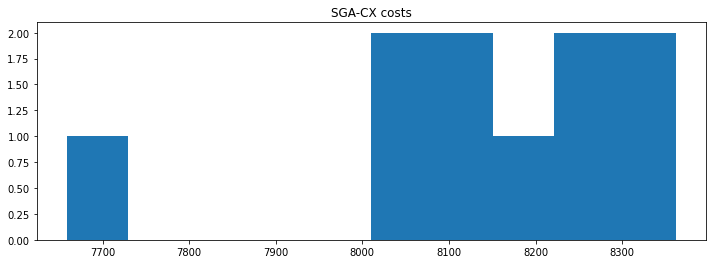

In [109]:
results=np.zeros(10)
print("SGA-CX:")
population_size = 500
chromosome_length = n
number_of_offspring = population_size
crossover_probability = 0.95
mutation_probability = 0.25
number_of_iterations = 250
for i in range(10):
    best_res, best_perm, duration = SGA_CX(population_size, chromosome_length, number_of_offspring, crossover_probability, mutation_probability, number_of_iterations)
    print(f"Permutation {best_perm} gives value {best_res} in time {duration}")
    results[i]=best_res
plt.figure(figsize=(12,4))
plt.title("SGA-CX costs")
plt.hist(results)
plt.show()

Zad.3

In [58]:
def perms(p, K):
    return [perm for perm in list(itertools.permutations(p)) if len([i for i in range(len(p)) if p[i] != perm[i]]) <= K]
#perms([1,2,3,4,5], 2)       

def local_search(p, K):
    size=len(p)
    k_perms=perms(p, K)
    costs=np.zeros(len(k_perms))
    for i in range(len(k_perms)):
        costs[i] = tsp_objective_function(k_perms[i, :])
    return k_perms[costs.argmin()]
def iterative_local_search(p, K):
    res=p
    last_res=p
    while True:
        res=local_search(res, K)
        if res == last_res:
            return res
        last_res=res

In [59]:
def SGA_PMX_with_local_search(population_size, chromosome_length, number_of_offspring, crossover_probability, mutation_probability, number_of_iterations, with_chart=False):
    time0 = time.time()
    best_objective_value = np.Inf
    best_chromosome = np.zeros((1, chromosome_length))
    costs = np.zeros(number_of_iterations)
    # generating an initial population
    current_population = np.zeros((population_size, chromosome_length), dtype=np.int64)
    for i in range(population_size):
        current_population[i, :] = np.random.permutation(chromosome_length)

    # evaluating the objective function on the current population
    objective_values = np.zeros(population_size)
    for i in range(population_size):
        objective_values[i] = tsp_objective_function(current_population[i, :])

    for t in range(number_of_iterations):
    
        # selecting the parent indices by the roulette wheel method
        fitness_values = objective_values.max() - objective_values
        if fitness_values.sum() > 0:
            fitness_values = fitness_values / fitness_values.sum()
        else:
            fitness_values = np.ones(population_size) / population_size
        parent_indices = np.random.choice(population_size, number_of_offspring, True, fitness_values).astype(np.int64)

        # creating the children population
        children_population = np.zeros((number_of_offspring, chromosome_length), dtype=np.int64)
        for i in range(int(number_of_offspring/2)):
            if np.random.random() < crossover_probability:
                children_population[2*i, :], children_population[2*i+1, :] = PMX(current_population[parent_indices[2*i], :].copy(), current_population[parent_indices[2*i+1], :].copy())
            else:
                children_population[2*i, :], children_population[2*i+1, :] = current_population[parent_indices[2*i], :].copy(), current_population[parent_indices[2*i+1]].copy()
        if np.mod(number_of_offspring, 2) == 1:
            children_population[-1, :] = current_population[parent_indices[-1], :]

        # mutating the children population
        for i in range(number_of_offspring):
            if np.random.random() < mutation_probability:
                children_population[i, :] = local_search(children_population[i, :],2)

        # evaluating the objective function on the children population
        children_objective_values = np.zeros(number_of_offspring)
        for i in range(number_of_offspring):
            children_objective_values[i] = tsp_objective_function(children_population[i, :])

        # replacing the current population by (Mu + Lambda) Replacement
        objective_values = np.hstack([objective_values, children_objective_values])
        current_population = np.vstack([current_population, children_population])

        I = np.argsort(objective_values)
        current_population = current_population[I[:population_size], :]
        objective_values = objective_values[I[:population_size]]

        best_idx=np.argmin(objective_values)
        # recording some statistics
        
        if best_objective_value > objective_values[best_idx]:
            best_objective_value = objective_values[best_idx]
            best_chromosome = current_population[best_idx, :]
        costs[t]=best_objective_value
    if with_chart:
        plt.figure(figsize=(12,4))
        plt.plot(costs)
        plt.show()
    return best_objective_value, best_chromosome, time.time() - time0

In [ ]:
def SGA_PMX_with_iterative_local_search(population_size, chromosome_length, number_of_offspring, crossover_probability, mutation_probability, number_of_iterations, with_chart=False):
    time0 = time.time()
    best_objective_value = np.Inf
    best_chromosome = np.zeros((1, chromosome_length))
    costs = np.zeros(number_of_iterations)
    # generating an initial population
    current_population = np.zeros((population_size, chromosome_length), dtype=np.int64)
    for i in range(population_size):
        current_population[i, :] = np.random.permutation(chromosome_length)

    # evaluating the objective function on the current population
    objective_values = np.zeros(population_size)
    for i in range(population_size):
        objective_values[i] = tsp_objective_function(current_population[i, :])

    for t in range(number_of_iterations):
    
        # selecting the parent indices by the roulette wheel method
        fitness_values = objective_values.max() - objective_values
        if fitness_values.sum() > 0:
            fitness_values = fitness_values / fitness_values.sum()
        else:
            fitness_values = np.ones(population_size) / population_size
        parent_indices = np.random.choice(population_size, number_of_offspring, True, fitness_values).astype(np.int64)

        # creating the children population
        children_population = np.zeros((number_of_offspring, chromosome_length), dtype=np.int64)
        for i in range(int(number_of_offspring/2)):
            if np.random.random() < crossover_probability:
                children_population[2*i, :], children_population[2*i+1, :] = PMX(current_population[parent_indices[2*i], :].copy(), current_population[parent_indices[2*i+1], :].copy())
            else:
                children_population[2*i, :], children_population[2*i+1, :] = current_population[parent_indices[2*i], :].copy(), current_population[parent_indices[2*i+1]].copy()
        if np.mod(number_of_offspring, 2) == 1:
            children_population[-1, :] = current_population[parent_indices[-1], :]

        # mutating the children population
        for i in range(number_of_offspring):
            if np.random.random() < mutation_probability:
                children_population[i, :] = iterative_local_search(children_population[i, :],2)

        # evaluating the objective function on the children population
        children_objective_values = np.zeros(number_of_offspring)
        for i in range(number_of_offspring):
            children_objective_values[i] = tsp_objective_function(children_population[i, :])

        # replacing the current population by (Mu + Lambda) Replacement
        objective_values = np.hstack([objective_values, children_objective_values])
        current_population = np.vstack([current_population, children_population])

        I = np.argsort(objective_values)
        current_population = current_population[I[:population_size], :]
        objective_values = objective_values[I[:population_size]]

        best_idx=np.argmin(objective_values)
        # recording some statistics
        
        if best_objective_value > objective_values[best_idx]:
            best_objective_value = objective_values[best_idx]
            best_chromosome = current_population[best_idx, :]
        costs[t]=best_objective_value
    if with_chart:
        plt.figure(figsize=(12,4))
        plt.plot(costs)
        plt.show()
    return best_objective_value, best_chromosome, time.time() - time0